In [1]:
# Cell for importing libraries
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Reading the data
path = r'A318_Jan_2026_tabela.csv'
df = pd.read_csv(path, sep=';', decimal=',')

In [3]:
# Evaluting column types and adjusting them
df.drop(columns=['Pto Orvalho Min. (C)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Radiacao (KJ/m²)'], inplace=True)

# Grouping date and time into one single column
df['Hora (UTC)'] = df['Hora (UTC)'].astype(str).str.zfill(4)
df['Datetime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora (UTC)'], format='%d/%m/%Y %H%M')
df.drop(columns=['Data', 'Hora (UTC)'], inplace=True)

In [4]:
def mover_coluna(df, col, pos=0):
    cols = df.columns.tolist()
    cols.insert(pos, cols.pop(cols.index(col)))
    return df[cols]

In [5]:
df = mover_coluna(df, 'Datetime', 0)
df = mover_coluna(df, 'Vel. Vento (m/s)', 1)
df = mover_coluna(df, 'Raj. Vento (m/s)', 2)
df = mover_coluna(df, 'Dir. Vento (m/s)', 3)
df.rename(columns={'Dir. Vento (m/s)':'Dir. Vento (°)'}, inplace=True)

In [6]:
df.head(5)

,Datetime,Vel. Vento (m/s),Raj. Vento (m/s),Dir. Vento (°),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Chuva (mm)
0,2026-01-01 00:00:00,3.6,7.1,49.0,27.2,27.3,27.1,76.0,76.0,74.0,1012.2,1012.2,1011.9,NaN
1,2026-01-01 01:00:00,3.8,9.1,54.0,27.1,27.3,27.1,76.0,76.0,76.0,1012.3,1012.4,1012.2,NaN
2,2026-01-01 02:00:00,3.1,6.9,64.0,26.9,27.1,26.9,77.0,77.0,76.0,1012.1,1012.3,1012.0,NaN
3,2026-01-01 03:00:00,2.8,6.8,58.0,27.1,27.1,26.9,77.0,77.0,77.0,1011.7,1012.1,1011.6,NaN
4,2026-01-01 04:00:00,3.2,7.1,67.0,27.0,27.1,27.0,77.0,77.0,77.0,1010.8,1011.7,1010.8,NaN


In [7]:
# Data investigation
df.describe()

,Vel. Vento (m/s),Raj. Vento (m/s),Dir. Vento (°),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Chuva (mm)
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,0.0
mean,3.847310,8.065931,72.521379,28.267310,28.815586,27.780966,68.608276,70.219310,66.958621,1008.764690,1009.010897,1008.513241,NaN
std,1.529881,2.716435,30.042762,2.466481,2.685426,2.269951,10.305067,9.639792,10.848197,1.480012,1.457891,1.481028,NaN
min,0.300000,1.500000,4.000000,22.600000,22.800000,22.300000,41.000000,43.000000,40.000000,1004.700000,1004.900000,1004.600000,NaN
25%,2.700000,6.400000,50.000000,26.600000,26.900000,26.300000,60.000000,63.000000,58.000000,1007.800000,1008.000000,1007.500000,NaN
50%,4.200000,8.700000,64.000000,27.700000,28.000000,27.500000,72.000000,73.000000,70.000000,1008.800000,1009.000000,1008.500000,NaN
75%,5.000000,10.100000,92.000000,30.300000,31.200000,29.600000,77.000000,77.000000,76.000000,1009.800000,1010.000000,1009.600000,NaN
max,7.200000,12.900000,360.000000,34.600000,35.200000,33.100000,89.000000,89.000000,88.000000,1012.300000,1012.400000,1012.200000,NaN


In [8]:
# Since rain has no data, we remove it
df.drop(columns='Chuva (mm)', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            744 non-null    datetime64[ns]
 1   Vel. Vento (m/s)    725 non-null    float64       
 2   Raj. Vento (m/s)    725 non-null    float64       
 3   Dir. Vento (°)      725 non-null    float64       
 4   Temp. Ins. (C)      725 non-null    float64       
 5   Temp. Max. (C)      725 non-null    float64       
 6   Temp. Min. (C)      725 non-null    float64       
 7   Umi. Ins. (%)       725 non-null    float64       
 8   Umi. Max. (%)       725 non-null    float64       
 9   Umi. Min. (%)       725 non-null    float64       
 10  Pressao Ins. (hPa)  725 non-null    float64       
 11  Pressao Max. (hPa)  725 non-null    float64       
 12  Pressao Min. (hPa)  725 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 75

In [10]:
# It seems there are more 'datetime' data than meteorological data. Let's check why:
df.tail(10)

,Datetime,Vel. Vento (m/s),Raj. Vento (m/s),Dir. Vento (°),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa)
734,2026-01-31 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,2026-01-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,2026-01-31 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,2026-01-31 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,2026-01-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,2026-01-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,2026-01-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,2026-01-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,2026-01-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,2026-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Remove the lines with no data:
df_clean = df.dropna(subset='Vel. Vento (m/s)')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            725 non-null    datetime64[ns]
 1   Vel. Vento (m/s)    725 non-null    float64       
 2   Raj. Vento (m/s)    725 non-null    float64       
 3   Dir. Vento (°)      725 non-null    float64       
 4   Temp. Ins. (C)      725 non-null    float64       
 5   Temp. Max. (C)      725 non-null    float64       
 6   Temp. Min. (C)      725 non-null    float64       
 7   Umi. Ins. (%)       725 non-null    float64       
 8   Umi. Max. (%)       725 non-null    float64       
 9   Umi. Min. (%)       725 non-null    float64       
 10  Pressao Ins. (hPa)  725 non-null    float64       
 11  Pressao Max. (hPa)  725 non-null    float64       
 12  Pressao Min. (hPa)  725 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 79

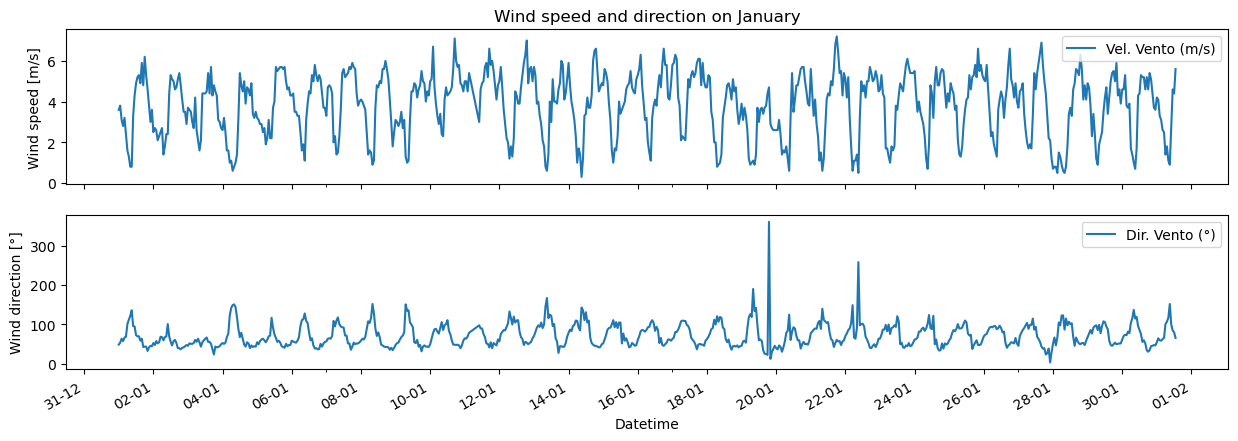

In [12]:
# now we have a clean dataset to play with.
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

df_clean.plot(ax=axes[0], kind='line', x='Datetime', y='Vel. Vento (m/s)', figsize=(15,5))
df_clean.plot(ax=axes[1], kind='line', x='Datetime', y='Dir. Vento (°)', figsize=(15,5))
axes[0].set_title("Wind speed and direction on January")
axes[0].set_xlabel("")
axes[0].set_ylabel("Wind speed [m/s]")

axes[1].set_ylabel("Wind direction [°]")

axes[1].xaxis.set_major_locator(mdates.DayLocator(interval=2))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))


plt.show()



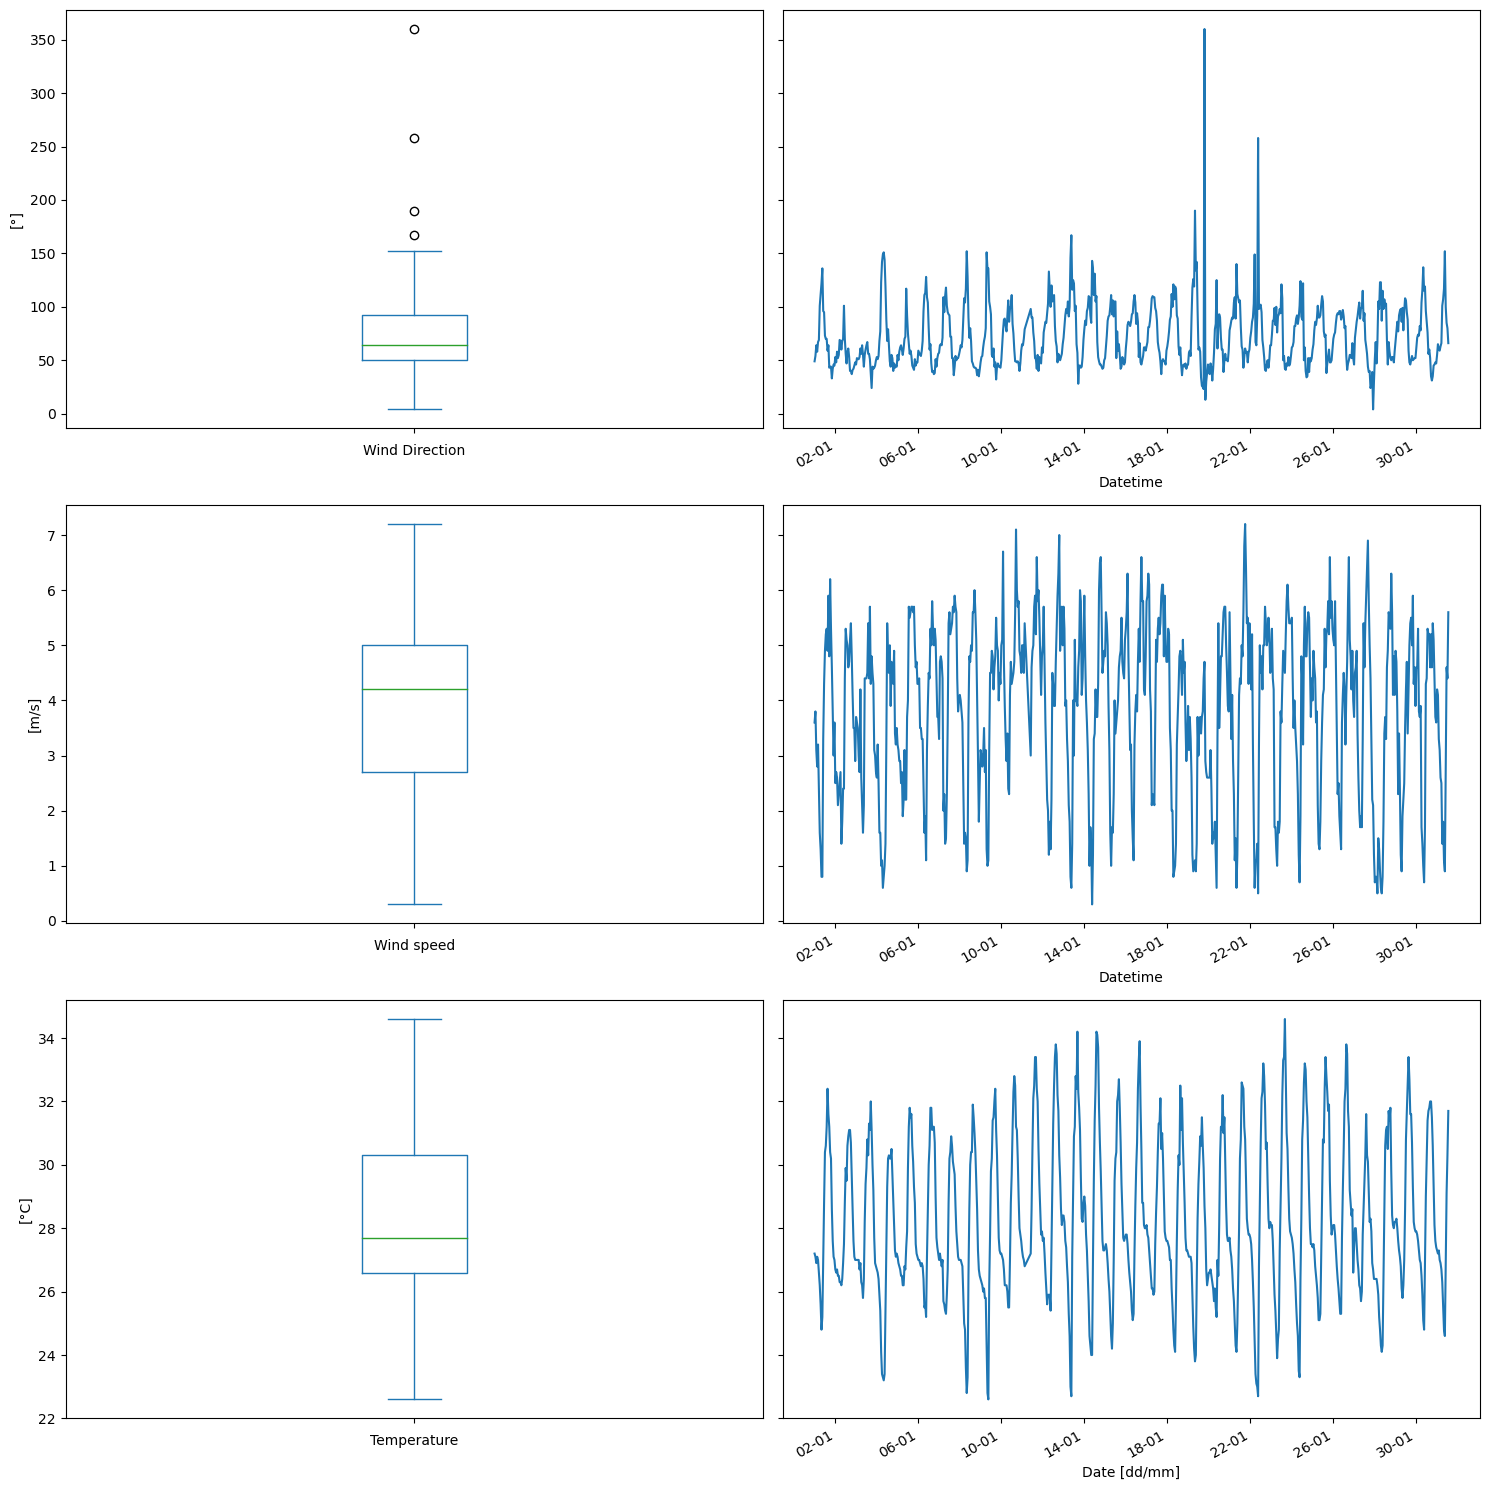

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(15,15), sharey='row')

df_clean.plot(ax=axes[0][0], kind='box', column='Dir. Vento (°)')
axes[0][0].set_xticklabels('')
axes[0][0].set_xlabel('Wind Direction')
axes[0][0].set_ylabel('[°]')

df_clean.plot(ax=axes[0][1], kind='line', x='Datetime', y='Dir. Vento (°)', legend=False)

df_clean.plot(ax=axes[1][0], kind='box', column='Vel. Vento (m/s)')
axes[1][0].set_xticklabels('')
axes[1][0].set_ylabel('[m/s]')
axes[1][0].set_xlabel('Wind speed')

df_clean.plot(ax=axes[1][1], kind='line', x='Datetime', y='Vel. Vento (m/s)', legend=False)

df_clean.plot(ax=axes[2][0], kind='box', column='Temp. Ins. (C)')
axes[2][0].set_xticklabels('')
axes[2][0].set_ylabel('[°C]')
axes[2][0].set_xlabel('Temperature')

df_clean.plot(ax=axes[2][1], kind='line', x='Datetime', y='Temp. Ins. (C)', legend=False)
axes[2][1].set_xlabel("Date [dd/mm]")

axes[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=4))
axes[0][1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axes[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=4))
axes[1][1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
axes[2][1].xaxis.set_major_locator(mdates.DayLocator(interval=4))
axes[2][1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

fig.tight_layout()
fig.savefig("my_plot.png", dpi=300, bbox_inches="tight")
